<a href="https://colab.research.google.com/github/hauduong05/ML_basics/blob/main/House_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd /content/drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


In [291]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [292]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [293]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [294]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [295]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


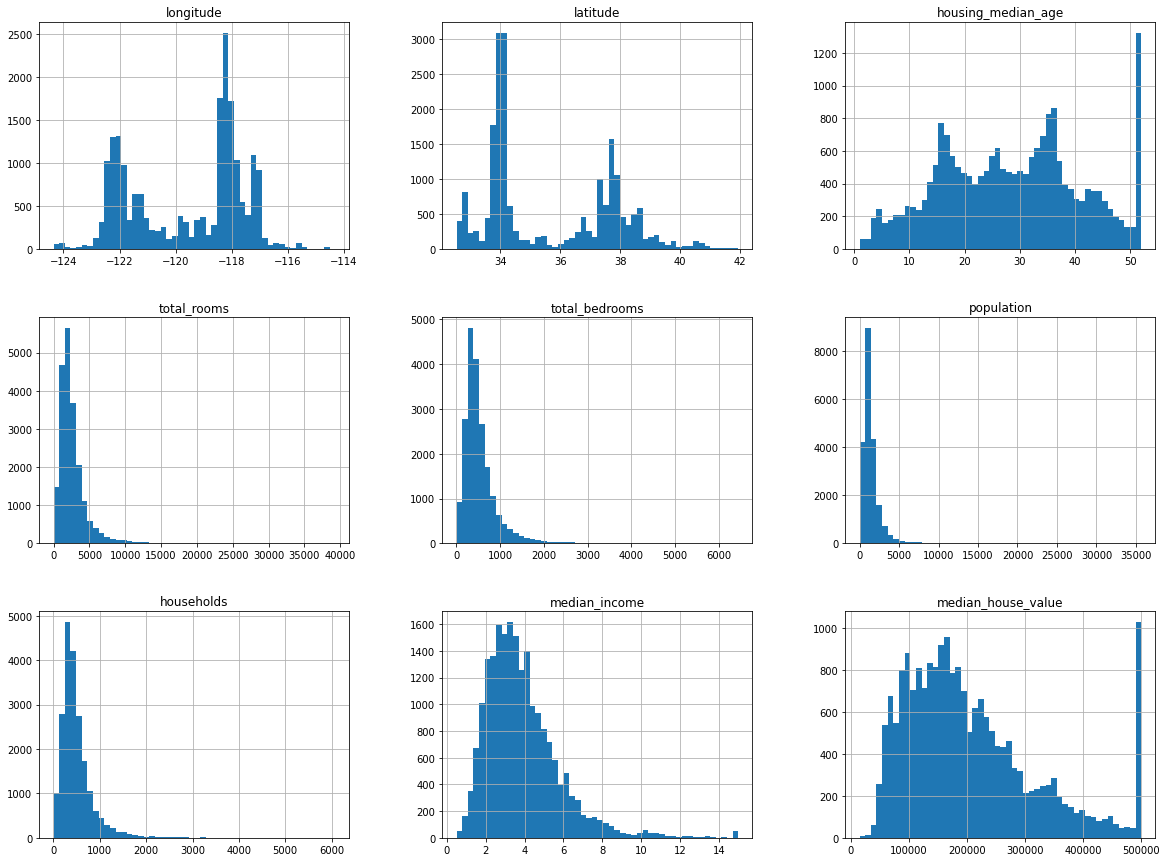

In [296]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [297]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


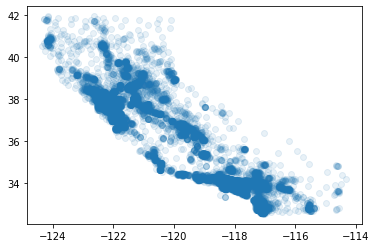

In [298]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.1)

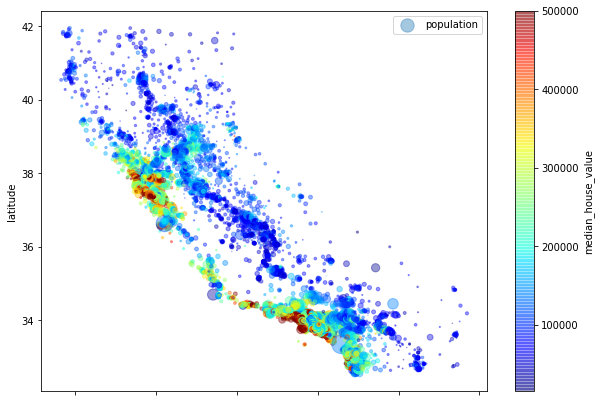

In [299]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7),
             s=housing['population']/100, c='median_house_value', label='population',
             cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [300]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [301]:
housing = pd.get_dummies(housing)
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [302]:
print(housing.isnull().sum())

housing = housing.fillna(method='ffill')

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


In [222]:
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=21, shuffle=True)

#train_set.values[:5]

In [255]:
housing['income'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=21)
for train_index, test_index in split.split(housing, housing['income']):
  train_set = housing.loc[train_index]
  test_set = housing.loc[test_index]

print(train_set)

       longitude  latitude  ...  ocean_proximity_NEAR OCEAN  income
13641    -117.33     34.05  ...                           0       1
20535    -121.74     38.55  ...                           0       2
11959    -117.44     33.90  ...                           0       3
6326     -117.96     34.00  ...                           0       3
15434    -117.25     33.21  ...                           0       2
...          ...       ...  ...                         ...     ...
12634    -121.47     38.49  ...                           0       2
4097     -118.41     34.15  ...                           0       5
13084    -121.36     38.57  ...                           0       4
7263     -118.23     33.99  ...                           0       2
4920     -118.25     34.00  ...                           0       2

[16512 rows x 15 columns]


In [279]:
scaler = MinMaxScaler()

X_train = train_set.drop('median_house_value', axis=1).values
y_train = train_set['median_house_value'].copy().values/1e5

X_test = test_set.drop('median_house_value', axis=1).values
y_test = test_set['median_house_value'].copy().values/1e5

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [282]:
num_features = X_train.shape[1]
num_epochs = 20000

model = nn.Linear(num_features, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [283]:
for epoch in range(num_epochs):
  pred = model(X_train)
  loss = criterion(y_train, pred)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f'Epoch : {epoch} - Loss = {loss:.3f}')

Streaming output truncated to the last 5000 lines.
Epoch : 15000 - Loss = 0.481
Epoch : 15001 - Loss = 0.481
Epoch : 15002 - Loss = 0.481
Epoch : 15003 - Loss = 0.481
Epoch : 15004 - Loss = 0.481
Epoch : 15005 - Loss = 0.481
Epoch : 15006 - Loss = 0.481
Epoch : 15007 - Loss = 0.481
Epoch : 15008 - Loss = 0.481
Epoch : 15009 - Loss = 0.481
Epoch : 15010 - Loss = 0.481
Epoch : 15011 - Loss = 0.481
Epoch : 15012 - Loss = 0.481
Epoch : 15013 - Loss = 0.481
Epoch : 15014 - Loss = 0.481
Epoch : 15015 - Loss = 0.481
Epoch : 15016 - Loss = 0.481
Epoch : 15017 - Loss = 0.481
Epoch : 15018 - Loss = 0.481
Epoch : 15019 - Loss = 0.481
Epoch : 15020 - Loss = 0.481
Epoch : 15021 - Loss = 0.481
Epoch : 15022 - Loss = 0.481
Epoch : 15023 - Loss = 0.481
Epoch : 15024 - Loss = 0.481
Epoch : 15025 - Loss = 0.481
Epoch : 15026 - Loss = 0.481
Epoch : 15027 - Loss = 0.481
Epoch : 15028 - Loss = 0.481
Epoch : 15029 - Loss = 0.481
Epoch : 15030 - Loss = 0.481
Epoch : 15031 - Loss = 0.481
Epoch : 15032 - Loss 

In [289]:
y_pred = model(X_test).detach()


print(criterion(y_pred, y_test).item())

0.6232762932777405
